# 6.4: Machine Learning - Regression

## This script contains the following:

### 1. Importing libraries and data

### 2. Data cleaning

### 3. Initial data prep for regression analysis

### 4. Hypothesis

### 5. Regression analysis

### 6. Re-running regression analysis without outliers

### 1. Importing libraries and data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Prompt matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Create path

path = r'C:\Users\Lenad\Documents\Data Analytics Immersion\Achievement 6\Jupyter folder\Achievement 6 project'

In [4]:
# Import data - adaptation of dataset with distances between other countries and UK included

df = pd.read_csv(os.path.join(path, '02. Data', 'Prepared data', 'Travelpac_cleaned_final_UK_only.csv'), index_col = False)

### 2. Data cleaning

In [5]:
df.head()

,Year,Quarter,UKOS,Mode,Country,Distance from UK,Purpose,Package,Age,Sex,Duration of trip,Number of visits,Number of nights,Expenditure,Sample,Continent,Length of stay,Period
0,2023,Jan-Mar,UK residents,Air,Australia,9449,Holiday,Independent,25-34,Male,14-27 nights,2234.480,44689.592,4.468959e+06,1,Europe,Medium stay,Jan - Mar
1,2023,Jan-Mar,UK residents,Air,Australia,9449,Holiday,Independent,25-34,Male,3-6 months,1161.154,125404.640,1.161154e+06,1,Europe,Short stay,Jan - Mar
2,2023,Jan-Mar,UK residents,Air,Australia,9449,Holiday,Independent,25-34,Female,14-27 nights,1184.436,23626.707,3.073333e+06,2,Europe,Medium stay,Jan - Mar
3,2023,Jan-Mar,UK residents,Air,Australia,9449,Holiday,Independent,25-34,Female,28-90 nights,4234.580,253600.625,2.195866e+07,3,Europe,Medium stay,Jan - Mar
4,2023,Jan-Mar,UK residents,Air,Australia,9449,Holiday,Independent,25-34,Female,3-6 months,4672.794,719513.350,5.208211e+07,2,Europe,Short stay,Jan - Mar


In [6]:
df.shape

(16729, 18)

In [7]:
# Check for missing values

df.isnull().sum()

Year                0
Quarter             0
UKOS                0
Mode                0
Country             0
Distance from UK    0
Purpose             0
Package             0
Age                 0
Sex                 0
Duration of trip    0
Number of visits    0
Number of nights    0
Expenditure         0
Sample              0
Continent           0
Length of stay      0
Period              0
dtype: int64

As the null values relate to groups of countries ('Other Africa', for example), I will drop them from the dataframe as they will not be of use in this analysis.

In [8]:
# Drop missing values

df.dropna(inplace=True)

In [9]:
df.shape

(16729, 18)

In [10]:
# Check for duplicates

dups = df.duplicated()

In [11]:
dups.shape # No duplicates

(16729,)

### 3. Initial data prep for regression analysis

In [12]:
# Create VFR (Visiting friends and relatives) subset

df_VFR = df.loc[df['Purpose'].isin(['VFR'])]

In [13]:
df_VFR.head()

,Year,Quarter,UKOS,Mode,Country,Distance from UK,Purpose,Package,Age,Sex,Duration of trip,Number of visits,Number of nights,Expenditure,Sample,Continent,Length of stay,Period
24,2023,Jan-Mar,UK residents,Air,Australia,9449,VFR,Independent,16-24,Female,14-27 nights,1900.360,36106.834,1.364458e+06,1,Europe,Medium stay,Jan - Mar
25,2023,Jan-Mar,UK residents,Air,Australia,9449,VFR,Independent,25-34,Male,14-27 nights,4449.732,79187.903,7.504351e+06,5,Europe,Medium stay,Jan - Mar
26,2023,Jan-Mar,UK residents,Air,Australia,9449,VFR,Independent,25-34,Male,28-90 nights,2083.191,97854.536,5.233161e+06,3,Europe,Medium stay,Jan - Mar
27,2023,Jan-Mar,UK residents,Air,Australia,9449,VFR,Independent,25-34,Female,14-27 nights,8417.680,194082.649,1.038915e+07,7,Europe,Medium stay,Jan - Mar
28,2023,Jan-Mar,UK residents,Air,Australia,9449,VFR,Independent,25-34,Female,28-90 nights,707.270,41021.640,2.829079e+05,1,Europe,Medium stay,Jan - Mar


In [14]:
df_VFR.shape

(5762, 18)

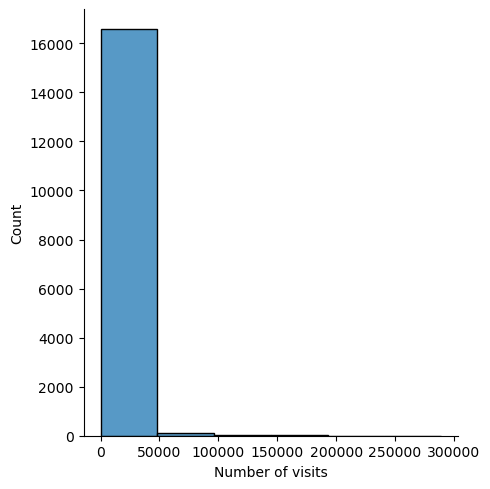

In [15]:
# Check distribution of number of visits for all purposes

sns.displot(df['Number of visits'], bins=6)

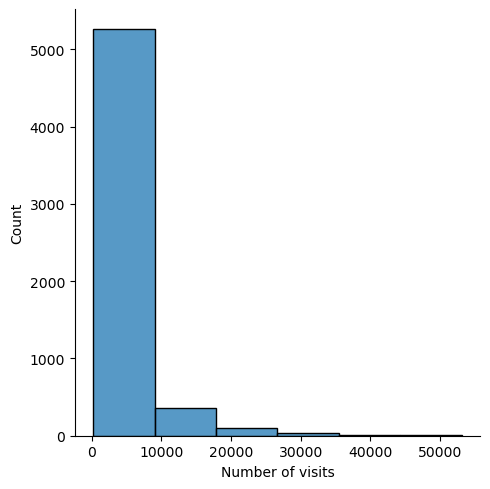

In [16]:
# Check distribution of number of visits for the purpose of visiting friends and relatives

sns.displot(df_VFR['Number of visits'], bins=6)

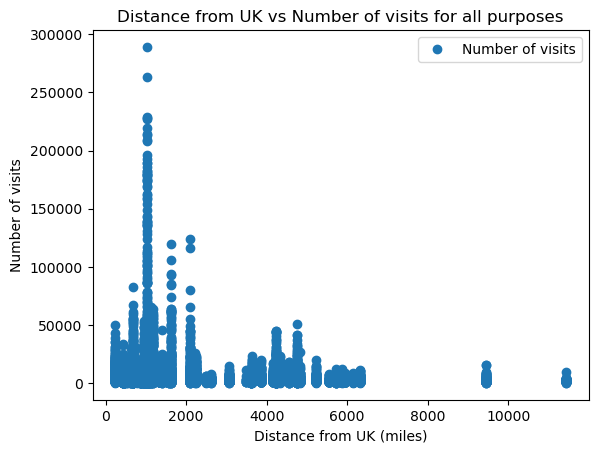

In [17]:
# Create scatterplot to see how many visits there were for all purposes

df.plot(x = 'Distance from UK', y='Number of visits',style='o')
plt.title('Distance from UK vs Number of visits for all purposes')  
plt.xlabel('Distance from UK (miles)')  
plt.ylabel('Number of visits')  
plt.show()

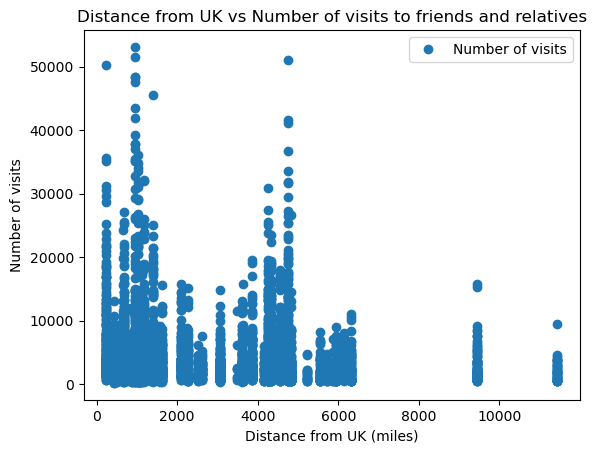

In [18]:
# Create scatterplot to see how many visits there were for thge purpose of visiting friends and relatives

df_VFR.plot(x = 'Distance from UK', y='Number of visits',style='o')
plt.title('Distance from UK vs Number of visits to friends and relatives')  
plt.xlabel('Distance from UK (miles)')  
plt.ylabel('Number of visits')  
plt.show()

### 4. Hypothesis

In the last exercise, I stated that it was possible that the relatively large number of visits to the UK from Canada and Australia were due to emigrants visiting friends and relatives. However, looking at the above scatterplot, I would like to hypothesise that there are more visits made by those visiting countries or visiting from countries that are nearer in distance to the UK than further away.

### 5. Further data prep for regression analysis

In [19]:
# Reshape variables into NumPy arrays and put them into separate objects.

X = df_VFR['Distance from UK'].values.reshape(-1,1)
y = df_VFR['Number of visits'].values.reshape(-1,1)

In [20]:
X

array([[9449],
       [9449],
       [9449],
       ...,
       [4244],
       [4244],
       [4244]], dtype=int64)

In [21]:
y

array([[1900.36 ],
       [4449.732],
       [2083.191],
       ...,
       [1435.202],
       [1615.803],
       [1316.284]])

In [22]:
# Split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 6. Regression analysis

In [23]:
# Create regression object

regression = LinearRegression()

In [24]:
# Fit regression object onto training set

regression.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

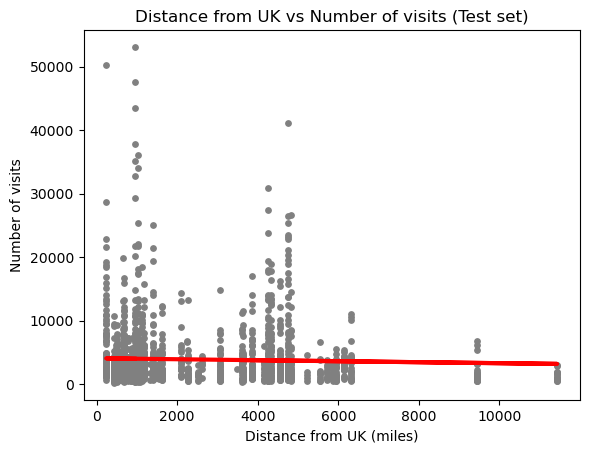

In [26]:
# Create plot showing the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Distance from UK vs Number of visits (Test set)')
plot_test.xlabel('Distance from UK (miles)')
plot_test.ylabel('Number of visits')
plot_test.show()

I am surprised that the line is so flat - I had anticipated a reasonably good fit as there are a higher number of visits for countries that are closer in distance to the UK. However, despite the very slight downward slant to the line, I do not believe that the fit is particularly accurate to the test set or that the model is a good fit.

In [27]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [28]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.07779933]]
Mean squared error:  24796219.88708189
R2 score:  0.0009348286360972846


In [29]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,11261.672,3800.760287
1,1567.742,3346.334406
2,5646.953,4028.712321
3,3116.903,4013.152455
4,1029.827,3710.979861
5,14057.033,3781.232655
6,2523.808,3799.282100
7,10136.387,3590.001905
8,1473.068,3993.158027
9,948.648,3799.282100


This model has performed badly on the test set. The predicted results were far from the actual results - in some cases by more than 10,000! However, I am prepared to admit that I either chose my data poorly or the dataset is arranged in such a way (with the data sectioned by sample size instead of individual records) that I was unlikely to get the result I was looking for. 

It is possible that collection and sample bias affected the original data, which might have then affected the output of the model - those conducting the original surveys did not work at night, which might have meant travellers from some countries were disproportionally misrepresented. Those surveying may also have targeted English speakers as well, who may be more plentiful in some countries than others.

I would need to change the predictor should I wish to re-run this progression, as the number of visits to friends and relatives must be determined by a different reason than distance.

### 6. Re-running regression analysis without outliers

In [30]:
# Clean extreme values

df_VFR_2 = df_VFR[df_VFR['Number of visits'] < 30000] 

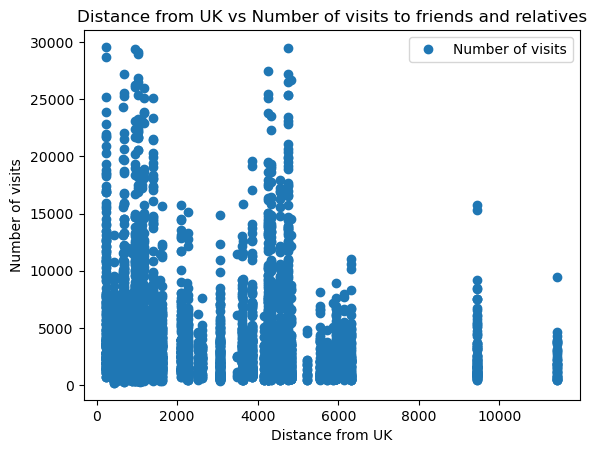

In [31]:
# See how the scatterplot looks without outliers.

df_VFR_2.plot(x = 'Distance from UK', y='Number of visits', style='o')  
plt.title('Distance from UK vs Number of visits to friends and relatives')  
plt.xlabel('Distance from UK')  
plt.ylabel('Number of visits')  
plt.show()

In [32]:
# Reshape variables into NumPy arrays and put them into separate objects again

X_2 = df_VFR_2['Distance from UK'].values.reshape(-1,1)
y_2 = df_VFR_2['Number of visits'].values.reshape(-1,1)

In [33]:
X_2

array([[9449],
       [9449],
       [9449],
       ...,
       [4244],
       [4244],
       [4244]], dtype=int64)

In [34]:
y_2

array([[1900.36 ],
       [4449.732],
       [2083.191],
       ...,
       [1435.202],
       [1615.803],
       [1316.284]])

In [35]:
# Split data into training and test sets

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [36]:
# Re-run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [37]:
# Predict

y_predicted_2 = regression.predict(X_test_2)

In [38]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [39]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.03321923]]
Mean squared error:  16968691.09251407
R2 score:  0.0007297947739979271


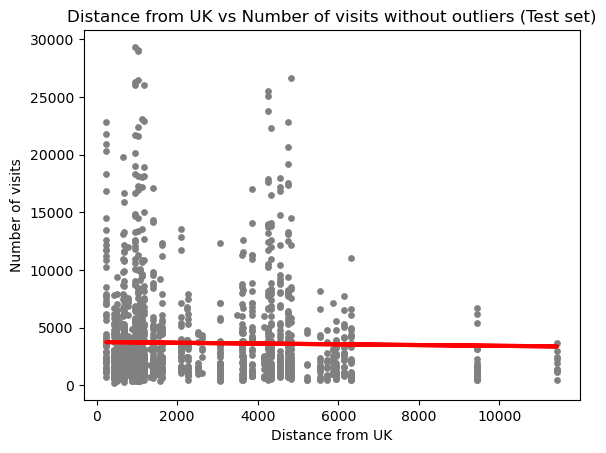

In [40]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Distance from UK vs Number of visits without outliers (Test set)')
plot_test.xlabel('Distance from UK')
plot_test.ylabel('Number of visits')
plot_test.show()

Unsurprisingly, removing the outliers has not increased the fit of the model! But it was a worthwhile check to run.